In [123]:
import numpy as np
import cv2 as cv
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import os
import time

In [96]:
"""
alex_data_dir = "./corner_detector_dataset/alex_data.csv"
javier_data_dir = "./corner_detector_dataset/javier_data.csv"
jose_data_dir = "./corner_detector_dataset/jose_data.csv"

alex_df = pd.read_csv(alex_data_dir)
javier_df = pd.read_csv(javier_data_dir)
jose_df = pd.read_csv(jose_data_dir)
full_df = pd.concat([alex_df, javier_df, jose_df])
"""

full_df = pd.read_csv("./corner_detector_dataset/final_data.csv")
images_dirs = full_df.image_dir.tolist()

In [97]:
image = cv.imread(images_dirs[0])
print(type(image))

<class 'numpy.ndarray'>


In [98]:
images = []
for image_name in images_dirs:
    image = cv.imread(image_name)
    image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    image = np.reshape(image, (image.shape[0], image.shape[1], 1))
    image = image.tolist()
    images.append(image)
images = np.array(images)
print(images.shape)

(2120, 32, 32, 1)


In [99]:
# DATA NORMALIZATION
images = images/255.0

In [100]:
full_df.head(10)

,index,image_dir,conv_a,conv_b,conv_c,conv_d,conv_e,conv_f,conv_g,conv_h,is_fridge_corner
0,1208,./corner_detector_dataset/images/javier_166432...,-8080.0,-8124.0,-6738.0,-7350.0,-1058.0,1058.0,328.0,-328.0,0.0
1,447,./corner_detector_dataset/data_augmentation_im...,-3218.0,-1586.0,-3466.0,-3770.0,1216.0,-1216.0,-664.0,664.0,1.0
2,1460,./corner_detector_dataset/images/alex_16643255...,-6807.0,-7623.0,-6611.0,-7145.0,-337.0,337.0,675.0,-675.0,0.0
3,1503,./corner_detector_dataset/images/josea_1664325...,-4297.0,-5539.0,-4787.0,-5879.0,415.0,-415.0,1167.0,-1167.0,0.0
4,1219,./corner_detector_dataset/images/alex_16643255...,-2863.0,-2731.0,-2799.0,-2677.0,-59.0,59.0,-127.0,127.0,0.0
5,348,./corner_detector_dataset/data_augmentation_im...,-2586.0,-2268.0,-2318.0,-1752.0,-392.0,392.0,-442.0,442.0,1.0
6,453,./corner_detector_dataset/data_augmentation_im...,-4013.0,-5093.0,-5341.0,-6011.0,1123.0,-1123.0,875.0,-875.0,1.0
7,1378,./corner_detector_dataset/images/josea_1664326...,-3540.0,-2590.0,-3182.0,-2304.0,-322.0,322.0,-914.0,914.0,0.0
8,484,./corner_detector_dataset/data_augmentation_im...,-2829.0,-6555.0,-2467.0,-7911.0,497.0,-497.0,4585.0,-4585.0,1.0
9,931,./corner_detector_dataset/images/josea_1664325...,-3135.0,-3433.0,-3281.0,-3533.0,123.0,-123.0,275.0,-275.0,0.0


In [101]:
y_values = full_df.is_fridge_corner

In [102]:
test_ratio = 0.2
X_train, X_test, y_train, y_test = train_test_split(images, y_values, test_size=test_ratio)

In [110]:
# TODO: REMEMBER TO DO DATA NORMALIZATION BEFORE PASSING IT AS NN INPUT

size_of_kernel = (5,5)
pooling_downscale_factors = (2,2) # pooling layers will reduce the input to half width and half height

model = keras.models.Sequential()
model.add( keras.layers.Conv2D(20, size_of_kernel, input_shape = (32, 32, 1), activation='relu') )
model.add( keras.layers.Dropout(0.4) )
model.add( keras.layers.Conv2D(20, size_of_kernel, activation='relu') )
model.add( keras.layers.Dropout(0.4) )
model.add( keras.layers.AveragePooling2D(pooling_downscale_factors) )
model.add( keras.layers.Conv2D(20, size_of_kernel, activation='relu') )
model.add( keras.layers.Dropout(0.4) )
model.add( keras.layers.Conv2D(20, size_of_kernel, activation='relu') )
model.add( keras.layers.Dropout(0.4) )
model.add( keras.layers.Flatten() )
model.add( keras.layers.Dense(320, activation='relu') )
model.add( keras.layers.Dropout(0.4) )
model.add( keras.layers.Dense(160, activation='relu') )
model.add( keras.layers.Dropout(0.4) )
model.add( keras.layers.Dense(20, activation='relu') )
model.add( keras.layers.Dropout(0.4) )
model.add( keras.layers.Dense(1, activation='sigmoid') )
#model.add(keras.layers.Flatten(input_shape=[28, 28]))

In [111]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_63 (Conv2D)          (None, 28, 28, 20)        520       
                                                                 
 dropout_73 (Dropout)        (None, 28, 28, 20)        0         
                                                                 
 conv2d_64 (Conv2D)          (None, 24, 24, 20)        10020     
                                                                 
 dropout_74 (Dropout)        (None, 24, 24, 20)        0         
                                                                 
 average_pooling2d_15 (Avera  (None, 12, 12, 20)       0         
 gePooling2D)                                                    
                                                                 
 conv2d_65 (Conv2D)          (None, 8, 8, 20)          10020     
                                                     

In [112]:

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999),                                                                                                                                                                       
              loss=tf.keras.losses.BinaryCrossentropy(),                                                                                                                                                                         
              metrics=[tf.keras.metrics.Accuracy()]) 
"""
model.compile(optimizer='sgd',                                                                                                                                                                       
              loss=tf.keras.losses.BinaryCrossentropy(),                                                                                                                                                                         
              metrics=[tf.keras.metrics.Accuracy()]) 
"""

"\nmodel.compile(optimizer='sgd',                                                                                                                                                                       \n              loss=tf.keras.losses.BinaryCrossentropy(),                                                                                                                                                                         \n              metrics=[tf.keras.metrics.Accuracy()]) \n"

In [113]:

history = model.fit(X_train, y_train, epochs=500, validation_split=0.1) # TODO: INCREASE NUMBER OF EPOCHS FOR A HIGHER VALUE (PREVIOUS 100), ACCURACY IS STILL LOW WITH 100 BUT ALGORITH DOES LEARN

Epoch 1/500


c:\Users\super\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\data_adapter.py:1506: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


48/48 [==============================] - 2s 40ms/step - loss: 0.6827 - accuracy: 0.0000e+00 - val_loss: 0.6732 - val_accuracy: 0.0000e+00
Epoch 2/500
48/48 [==============================] - 2s 37ms/step - loss: 0.6823 - accuracy: 0.0000e+00 - val_loss: 0.6705 - val_accuracy: 0.0000e+00
Epoch 3/500
48/48 [==============================] - 2s 39ms/step - loss: 0.6726 - accuracy: 0.0000e+00 - val_loss: 0.6413 - val_accuracy: 0.0000e+00
Epoch 4/500
48/48 [==============================] - 2s 37ms/step - loss: 0.6611 - accuracy: 0.0000e+00 - val_loss: 0.6265 - val_accuracy: 0.0000e+00
Epoch 5/500
48/48 [==============================] - 2s 37ms/step - loss: 0.6613 - accuracy: 0.0000e+00 - val_loss: 0.6035 - val_accuracy: 0.0000e+00
Epoch 6/500
48/48 [==============================] - 2s 37ms/step - loss: 0.5726 - accuracy: 0.0000e+00 - val_loss: 0.6395 - val_accuracy: 0.0000e+00
Epoch 7/500
48/48 [==============================] - 2s 38ms/step - loss: 0.4717 - accuracy: 0.0000e+00 - val_lo

KeyboardInterrupt: 

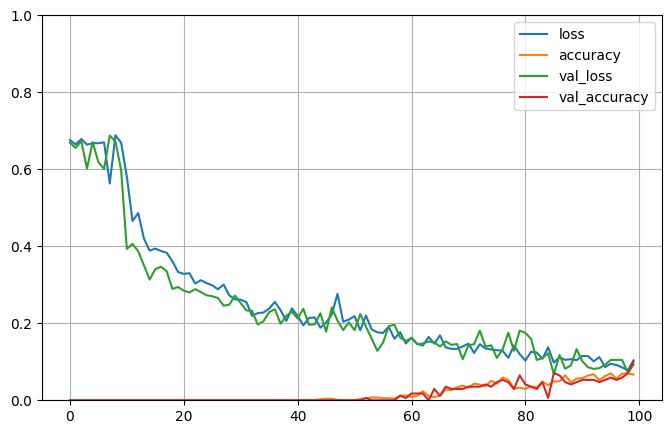

In [114]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [108]:
model.evaluate(X_test, y_test)

14/14 [==============================] - 0s 6ms/step - loss: 0.2024 - accuracy: 0.0755


[0.2024109661579132, 0.07547169923782349]

In [109]:
# ==================== WE SAVE THE MODEL ====================
model_name = "cnn_model_1"
model_notes = ""

model.save('./corner_detector_models/' + model_name)
model_summary_file = open('./corner_detector_models/models_summary.txt', "a+")
model_summary_file.write("\n")
model_summary_file.write("======================= {name} =======================".format(name=model_name))
final_model_notes = ""
i = 0
while i < len(model_notes):
    final_model_notes += model_notes[i:i+50]
model_summary_file.write(final_model_notes)
model_summary_file.close()

INFO:tensorflow:Assets written to: ./corner_detector_models/cnn_model_1\assets


## We test corner detector efficiency sweeping, trough a raw image

In [ ]:
def sweep_image(image):
    kernel_size = 32
    kernel_size_half = int(kernel_size/2)
    for i in range(kernel_size_half, image.shape[0] - kernel_size_half, kernel_size_half):
        for j in range(kernel_size_half, image.shape[1] - kernel_size_half, kernel_size_half):
            image_copy = image.copy()
            #image_copy = cv.rectangle(image_copy, (j-kernel_size_half, i-kernel_size_half), (j+kernel_size_half, i+kernel_size_half), (255, 0, 0), 2)
            roi = image_copy[i-kernel_size_half:i+kernel_size_half,j-kernel_size_half:j+kernel_size_half]
            roi = cv.cvtColor(roi,cv.COLOR_BGR2GRAY)
            roi = np.reshape(roi, (32, 32, 1))
            

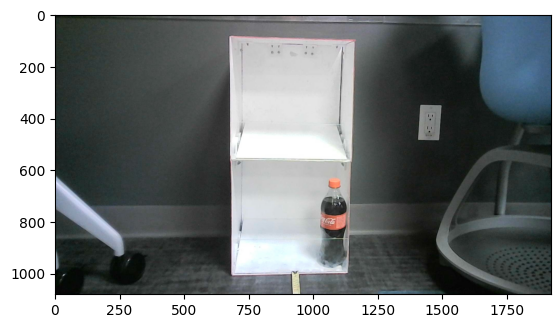

In [130]:
test_images_dir = "./test1_images/"
raw_images_dirs = []
for image in os.listdir(test_images_dir):
    if image.endswith(".jpg"):
        raw_images_dirs.append(os.path.join(test_images_dir, image))

test_image = cv.imread(raw_images_dirs[0])
test_image = cv.cvtColor(test_image, cv.COLOR_BGR2RGB)
plt.imshow(test_image)
plt.show()